# Graph Cuts

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [15]:
nx_draw_style = dict(node_color="tab:red", font_size=16, font_color="whitesmoke")

In [16]:
seed = 42

## Generate a Graph

In [17]:
G_bb = nx.barbell_graph(3, 0)

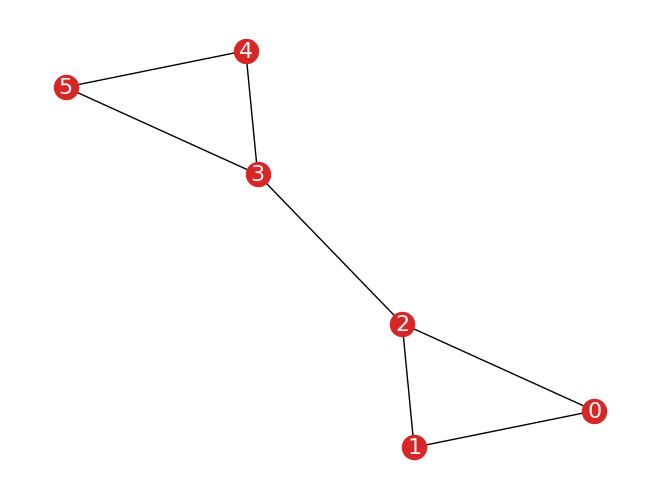

In [18]:
pos = nx.spring_layout(G_bb, seed=seed)  # Seed for reproducible layout
nx.draw(G_bb, pos=pos, with_labels = True, **nx_draw_style)
plt.show()

In [19]:
def ratio_cut_size(G, S, T=None, weight=None):

    if T is None:
        T = set(G) - set(S)
    num_cut_edges = nx.cut_size(G, S, T=T, weight=weight)
    norm_S = len(S)
    norm_T = len(T)
    return num_cut_edges * ((1 / norm_S) + (1 / norm_T))


def compare_cuts(graph, partition):

    return {
        "cut": nx.cut_size(graph, partition[1], partition[2]),
        "ncut": nx.normalized_cut_size(graph, partition[1], partition[2]),
        "ratio_cut": ratio_cut_size(graph, partition[1], partition[2])
    }


In [20]:
partition_bb_1 = {
    1: {0, 1, 2},
    2: {3, 4, 5}
}

partition_bb_2 = {
    1: {0, 1, 2, 3},
    2: {4, 5}
}

In [21]:
compare_cuts(
    G_bb, partition_bb_1
), compare_cuts(
    G_bb, partition_bb_2
)


({'cut': 1, 'ncut': 0.2857142857142857, 'ratio_cut': 0.6666666666666666},
 {'cut': 2, 'ncut': 0.7, 'ratio_cut': 1.5})

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8a1762a-62b2-46cf-95c0-ea77984dacfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>